In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [275]:
df.shape

(10000, 6)

In [276]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [277]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [278]:
df.duplicated().sum()

127

In [279]:
df.drop_duplicates(inplace = True)
df.shape

(9873, 6)

In [280]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [281]:
df.columns = ['hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced', 'performance_index']
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [282]:
# Exchange yes or no for 0 and 1 in the extracurricular column
df["extracurricular_activities"] = df["extracurricular_activities"].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [283]:
df.eq(0).sum()

hours_studied                          0
previous_scores                        0
extracurricular_activities          4986
sleep_hours                            0
sample_question_papers_practiced     937
performance_index                      0
dtype: int64

In [284]:
df[df<0].sum()

hours_studied                       0.0
previous_scores                     0.0
extracurricular_activities          0.0
sleep_hours                         0.0
sample_question_papers_practiced    0.0
performance_index                   0.0
dtype: float64

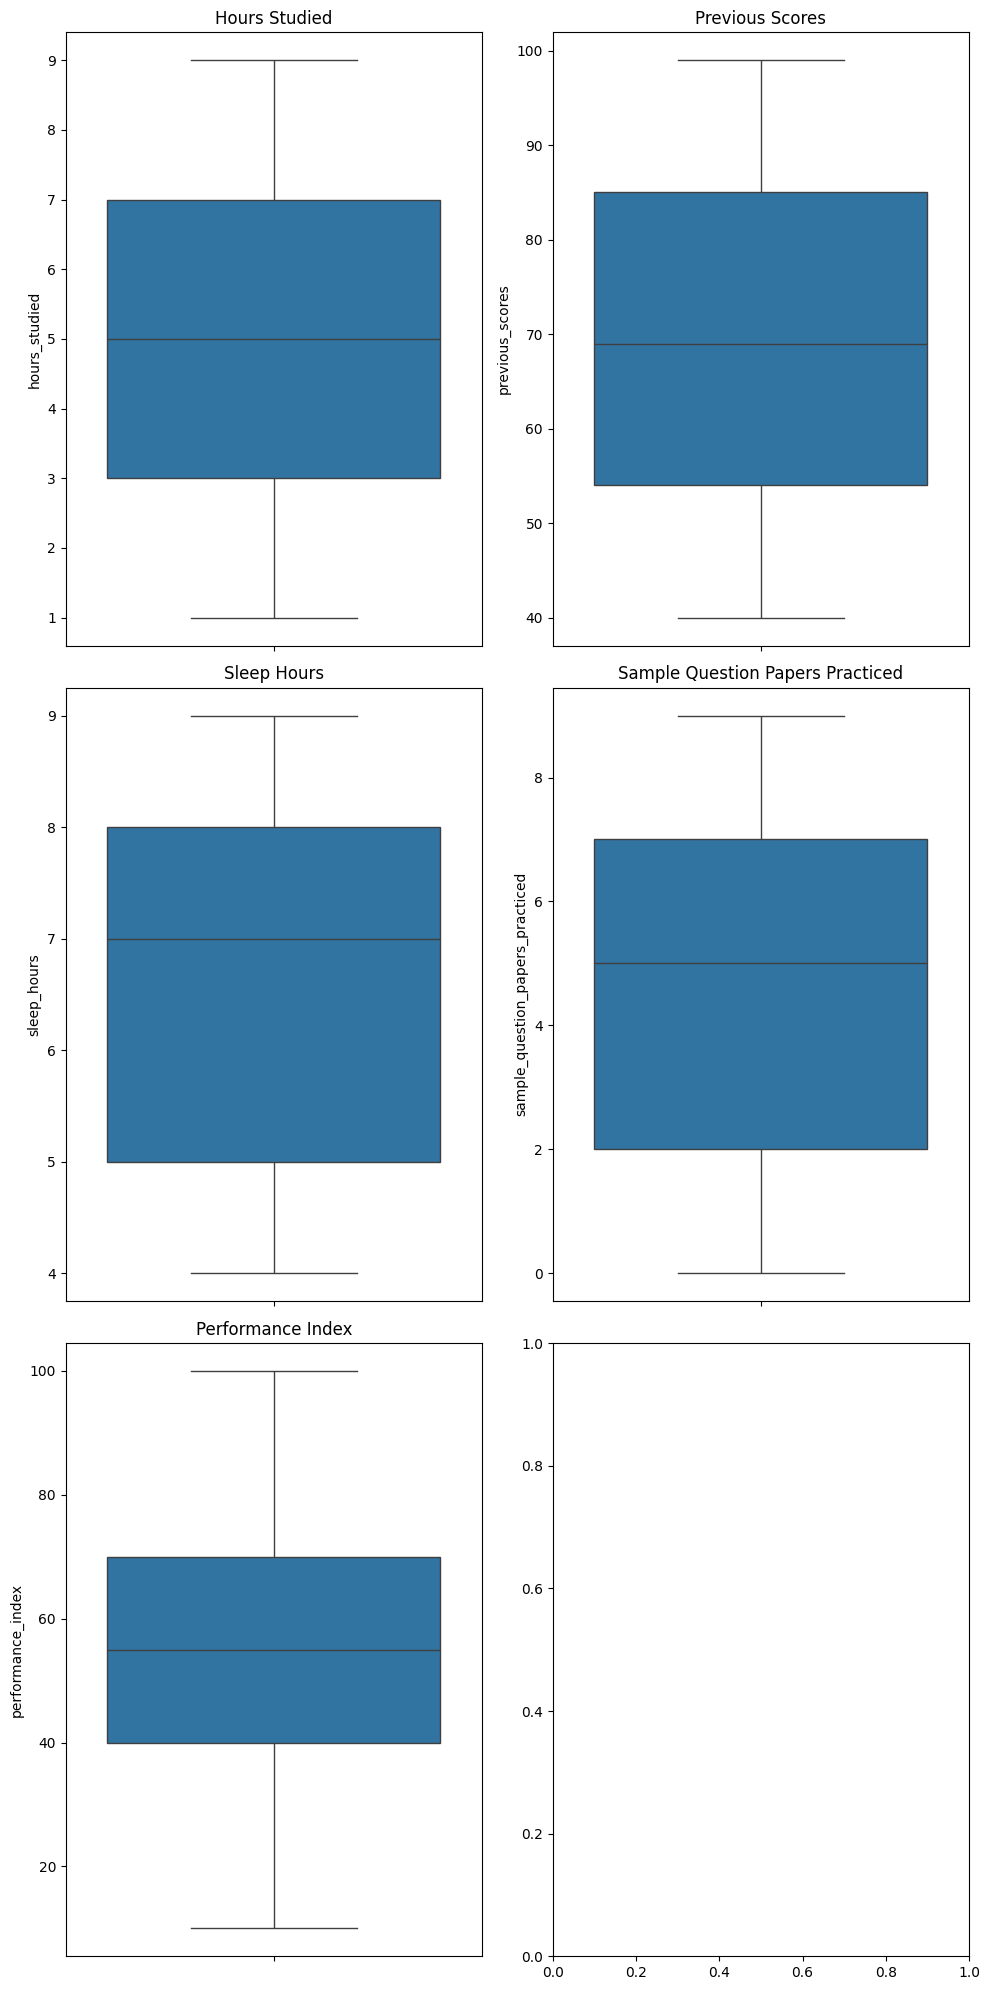

In [285]:
fig, axs = plt.subplots(3, 2, figsize=(10, 20))  # create 5 subplots

sns.boxplot(df['hours_studied'], ax=axs[0,0])
sns.boxplot(df['previous_scores'], ax=axs[0,1])
sns.boxplot(df['sleep_hours'], ax=axs[1,0])
sns.boxplot(df['sample_question_papers_practiced'], ax=axs[1,1])
sns.boxplot(df['performance_index'], ax=axs[2,0])
axs[0,0].set_title('Hours Studied')
axs[0,1].set_title('Previous Scores')
axs[1,0].set_title('Sleep Hours')
axs[1,1].set_title('Sample Question Papers Practiced')
axs[2,0].set_title('Performance Index')
plt.tight_layout() 
plt.show()

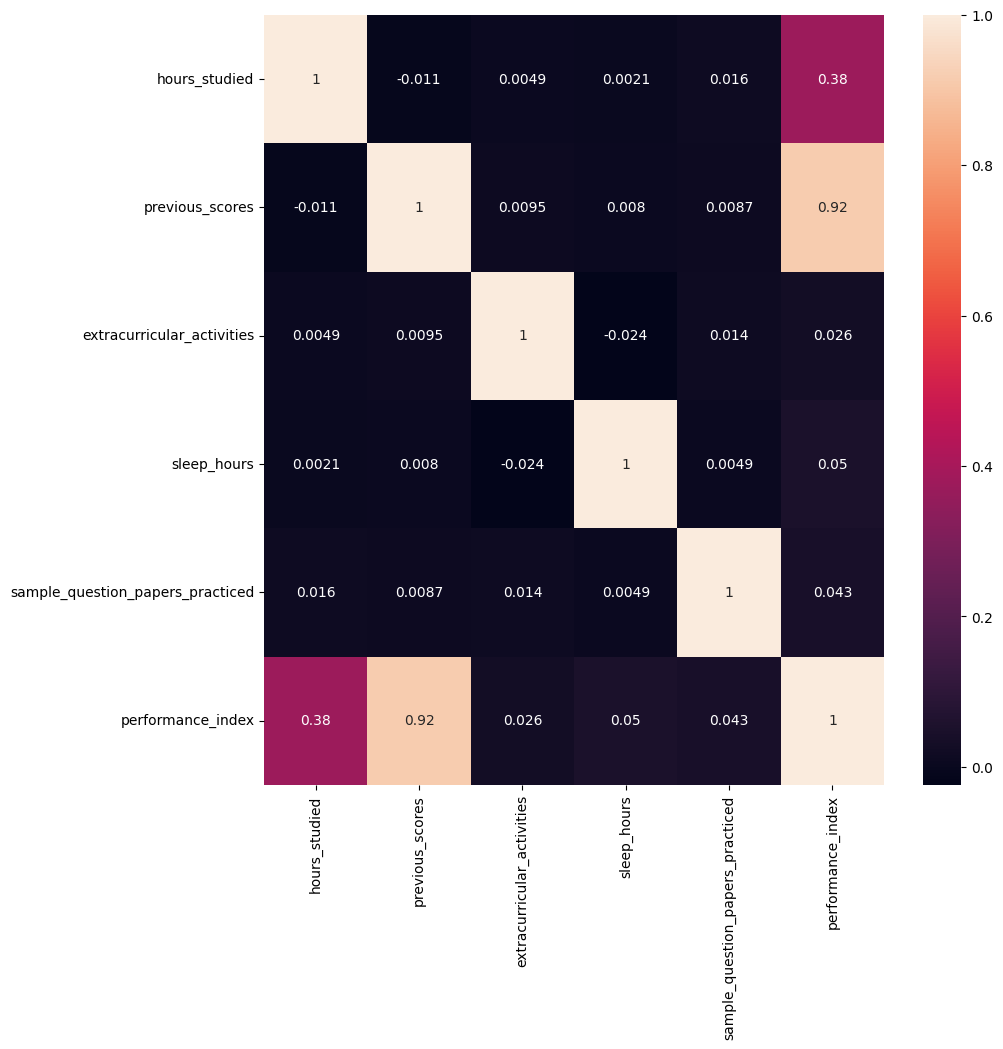

In [286]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

plt.show()

In [287]:
correlation_with_target = df.drop('performance_index', axis=1).apply(lambda x: x.corr(df['performance_index']))

correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

selected_features_correlation = correlation_with_target[correlation_with_target >= 0.2].index.tolist()

print("Selected features based on correlation with target variable:")
print(selected_features_correlation)


Selected features based on correlation with target variable:
['previous_scores', 'hours_studied']


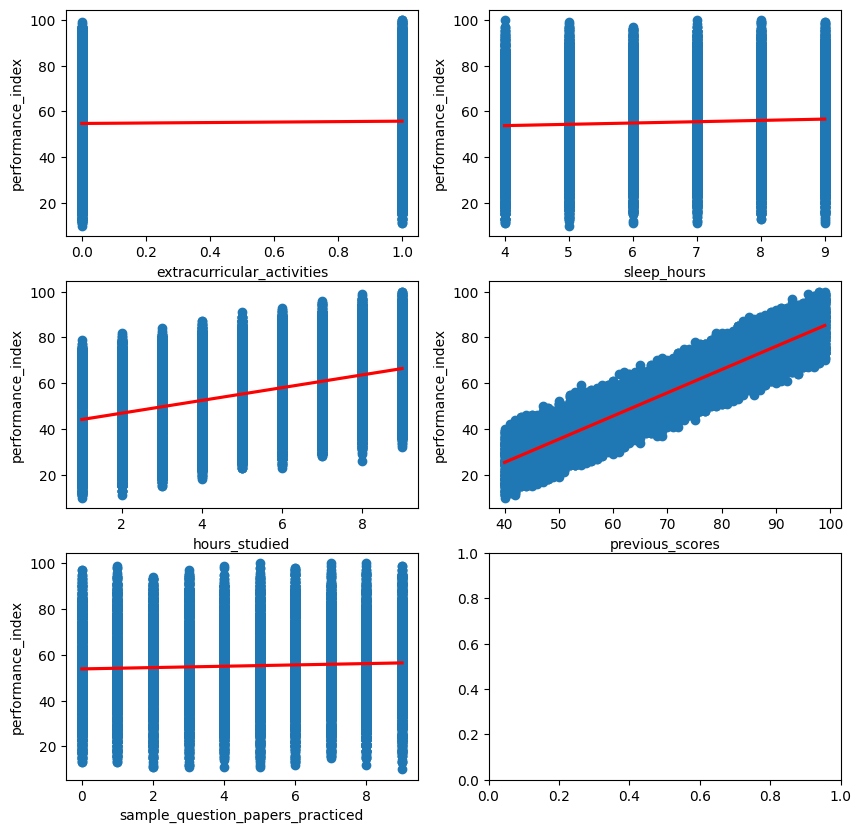

In [288]:
#Plots to show the linear relashionship between radius_mean and redundannt features
fig,ax = plt.subplots(3,2,figsize = (10,10))

ax[0,0].scatter(df['extracurricular_activities'],df["performance_index"])
ax[0,0].set_xlabel('extracurricular_activities')
sns.regplot(x='extracurricular_activities',y='performance_index',data=df,ax=ax[0,0],color='r',scatter=False)

ax[0,1].scatter(df['sleep_hours'],df["performance_index"])
ax[0,1].set_xlabel('sleep_hours')
sns.regplot(x='sleep_hours',y='performance_index',data=df,ax=ax[0,1],color='r',scatter=False)

ax[1,0].scatter(df['hours_studied'],df["performance_index"])
ax[1,0].set_xlabel('hours_studied')
sns.regplot(x='hours_studied',y='performance_index',data=df,ax=ax[1,0],color='r',scatter=False)

ax[1,1].scatter(df['previous_scores'],df["performance_index"])
ax[1,1].set_xlabel('previous_scores')
sns.regplot(x='previous_scores',y='performance_index',data=df,ax=ax[1,1],color='r',scatter=False)

ax[2,0].scatter(df['sample_question_papers_practiced'],df["performance_index"])
ax[2,0].set_xlabel('sample_question_papers_practiced')
sns.regplot(x='sample_question_papers_practiced',y='performance_index',data=df,ax=ax[2,0],color='r',scatter=False)


plt.show()

In [289]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('performance_index ~ hours_studied + previous_scores + extracurricular_activities + sleep_hours + sample_question_papers_practiced', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
hours_studied,5.383278e+05,1.0,128837.795544,0.000000e+00
previous_scores,3.071836e+06,1.0,735181.388693,0.000000e+00
extracurricular_activities,9.377754e+02,1.0,224.437443,3.462555e-50
sleep_hours,6.559767e+03,1.0,1569.946740,9.445646e-319
sample_question_papers_practiced,3.049914e+03,1.0,729.934822,3.721290e-155
Residual,4.122766e+04,9867.0,NaN,NaN


In [290]:
significant_features = anova_table[anova_table['PR(>F)'] < 0.05]

significant_feature_names = significant_features.index.tolist()

print("Significant features based on ANOVA:")
print(significant_feature_names)


Significant features based on ANOVA:
['hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced']


In [291]:
x = df.drop(['performance_index'], axis=1)
y = df['performance_index']

In [292]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [293]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

In [294]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print(f"The Mean Squared Error is {mse}\nThe R2 score is {r2}\nThe adjusted R2 score is {r2adjusted}")


The Mean Squared Error is 4.305900938538476
The R2 score is 0.9884301209927054
The adjusted R2 score is 0.9884007409038094


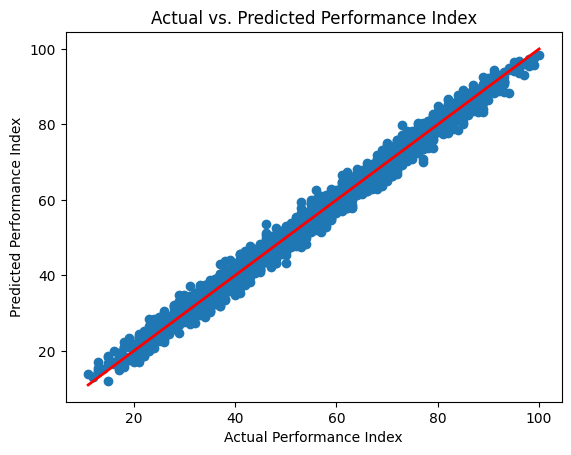

In [295]:
# Scatter plot of actual vs. predicted performance_index
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')

# Draw a line representing perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)

plt.show()


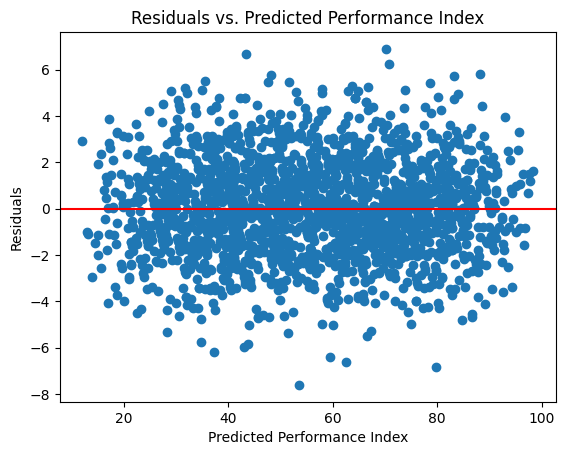

In [296]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Performance Index')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [297]:
x= df.drop(['performance_index','extracurricular_activities','sleep_hours', 'sample_question_papers_practiced'], axis=1)
y= df['performance_index']

In [298]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [299]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

In [300]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print(f"The Mean Squared Error is {mse}\nThe R2 score is {r2}\nThe adjusted R2 score is {r2adjusted}")


The Mean Squared Error is 5.573764139536915
The R2 score is 0.9850233951895029
The adjusted R2 score is 0.9850082059351312


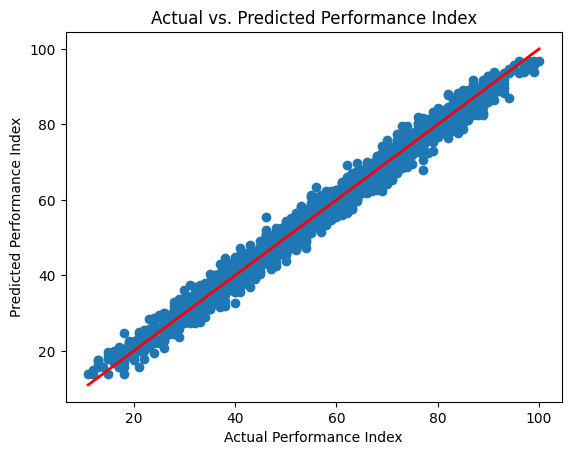

In [301]:
# Scatter plot of actual vs. predicted performance_index
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')

# Draw a line representing perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)

plt.show()


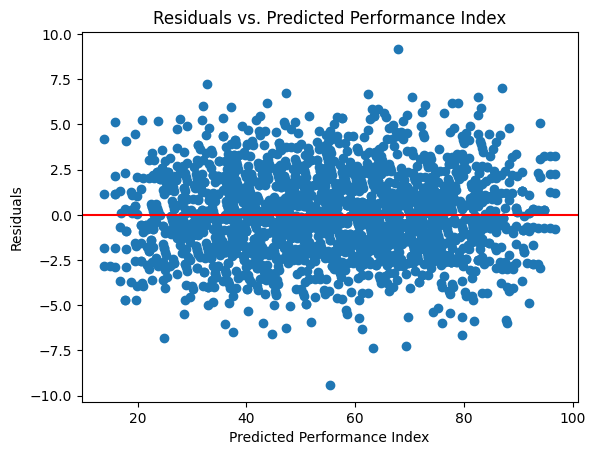

In [302]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Performance Index')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
